In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df=pd.read_excel('/Users/michaelrosen/Desktop/AMB/lane_miles_and_VMT.xlsx')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   YEAR                                    40 non-null     int64  
 1   INTERSTATE (RURAL)                      40 non-null     float64
 2   OTHER FREEWAYS AND EXPRESSWAYS (RURAL)  11 non-null     float64
 3   OTHER PRINCIPAL ARTERIAL (RURAL)        40 non-null     float64
 4   MINOR ARTERIAL (RURAL)                  40 non-null     float64
 5   MAJOR COLLECTOR (RURAL)                 40 non-null     float64
 6   MINOR COLLECTOR (RURAL)                 40 non-null     float64
 7   LOCAL (RURAL)                           40 non-null     float64
 8   TOTAL (RURAL)                           40 non-null     float64
 9   INTERSTATE (URBAN)                      40 non-null     float64
 10  OTHER FREEWAYS AND EXPRESSWAYS (URBAN)  40 non-null     float64


In [80]:
df['URBAN FREEWAYS']=df['INTERSTATE (URBAN)']+df['OTHER FREEWAYS AND EXPRESSWAYS (URBAN)']

In [81]:
df['URBAN_ALL']=df['INTERSTATE (URBAN)']+df['OTHER FREEWAYS AND EXPRESSWAYS (URBAN)']+df['OTHER PRINCIPAL ARTERIAL (URBAN)']+df['MINOR ARTERIAL (URBAN)']

In [82]:
df['FREEWAYS+ARTERIALS_NORM']=(df['URBAN_ALL']/df.iat[0,20])*100

In [83]:
df['ALL_URBAN_NORM']=(df['TOTAL (URBAN)']/df.iat[0,16])*100

In [84]:
df['VMT_NORM']=(df['VMT']/df.iat[0,18])*100

In [85]:
df['FREEWAYS_NORM']=(df['URBAN FREEWAYS']/df.iat[0,19])*100

In [86]:
df.head()

,YEAR,INTERSTATE (RURAL),OTHER FREEWAYS AND EXPRESSWAYS (RURAL),OTHER PRINCIPAL ARTERIAL (RURAL),MINOR ARTERIAL (RURAL),MAJOR COLLECTOR (RURAL),MINOR COLLECTOR (RURAL),LOCAL (RURAL),TOTAL (RURAL),INTERSTATE (URBAN),...,LOCAL (URBAN),TOTAL (URBAN),TLM,VMT,URBAN FREEWAYS,URBAN_ALL,FREEWAYS+ARTERIALS_NORM,ALL_URBAN_NORM,VMT_NORM,FREEWAYS_NORM
0,1980,130980.0,NaN,201334.0,305764.0,832041.0,599226.0,4457584.0,6526929.0,48458.0,...,867986.0,1395245.0,7922174.0,1527295,77945.0,382131.0,100.000000,100.000000,100.000000,100.000000
1,1981,128301.0,NaN,193624.0,293235.0,816564.0,599048.0,4434670.0,6465442.0,47712.0,...,871234.0,1391118.0,7856560.0,1555308,76745.0,376689.0,98.575881,99.704210,101.834158,98.460453
2,1982,132011.0,NaN,203147.0,312129.0,885115.0,597920.0,4448994.0,6579316.0,50187.0,...,883686.0,1433597.0,8012913.0,1595010,80796.0,399538.0,104.555244,102.748765,104.433656,103.657707
3,1983,131825.0,NaN,202488.0,309549.0,884357.0,600138.0,4441024.0,6569381.0,54217.0,...,913870.0,1485687.0,8055068.0,1652788,84775.0,414127.0,108.373045,106.482159,108.216684,108.762589
4,1984,131245.0,NaN,201918.0,308416.0,872089.0,596504.0,4449220.0,6559392.0,56616.0,...,929556.0,1516757.0,8076149.0,1720269,87727.0,425417.0,111.327529,108.709008,112.635018,112.549875


In [153]:
uspop=pd.read_excel('/Users/michaelrosen/Desktop/AMB/POPTHM.xls')

In [154]:
uspop.set_index('Year',inplace=True)

In [155]:
df['FREEWAYS+ARTERIALS_per_capita']=(df['URBAN_ALL']*1000000)/((uspop['Population']*1000))
df['FREEWAYS_per_capita']=(df['URBAN FREEWAYS']*1000000)/((uspop['Population']*1000))
df['ALL_URBAN_per_capita']=(df['TOTAL (URBAN)']*1000000)/((uspop['Population']*1000))
df['VMT_per_capita']=(df['VMT']*1000000)/((uspop['Population']*1000))

In [161]:
df.head()

,INTERSTATE (RURAL),OTHER FREEWAYS AND EXPRESSWAYS (RURAL),OTHER PRINCIPAL ARTERIAL (RURAL),MINOR ARTERIAL (RURAL),MAJOR COLLECTOR (RURAL),MINOR COLLECTOR (RURAL),LOCAL (RURAL),TOTAL (RURAL),INTERSTATE (URBAN),OTHER FREEWAYS AND EXPRESSWAYS (URBAN),...,VMT_NORM,FREEWAYS_NORM,FREEWAYS+ARTERIALS_per_capita,FREEWAYS_per_capita,ALL_URBAN_per_capita,VMT_per_capita,FREEWAYS+ARTERIALS_per_capita_NORM,FREEWAYS_per_capita_NORM,ALL_URBAN_per_capita_NORM,VMT_per_capita_NORM
YEAR,,,,,,,,,,,,,,,,,,,,,
1980,130980.0,NaN,201334.0,305764.0,832041.0,599226.0,4457584.0,6526929.0,48458.0,29487.0,...,100.000000,100.000000,1678.030966,342.275617,6126.863077,6706.727022,100.000000,100.000000,100.000000,100.000000
1981,128301.0,NaN,193624.0,293235.0,816564.0,599048.0,4434670.0,6465442.0,47712.0,29033.0,...,101.834158,98.460453,1637.717737,333.661582,6048.115613,6761.958797,97.597587,97.483305,98.714718,100.823528
1982,132011.0,NaN,203147.0,312129.0,885115.0,597920.0,4448994.0,6579316.0,50187.0,30609.0,...,104.433656,103.657707,1720.527377,347.931185,6173.487594,6868.579139,102.532517,101.652344,100.760985,102.413280
1983,131825.0,NaN,202488.0,309549.0,884357.0,600138.0,4441024.0,6569381.0,54217.0,30558.0,...,108.216684,108.762589,1767.261073,361.772011,6340.076359,7053.169426,105.317548,105.696110,103.479975,105.165596
1984,131245.0,NaN,201918.0,308416.0,872089.0,596504.0,4449220.0,6559392.0,56616.0,31111.0,...,112.635018,112.549875,1799.608070,371.104627,6416.217823,7277.118627,107.245224,108.422747,104.722723,108.504768


In [160]:
df['FREEWAYS+ARTERIALS_per_capita_NORM']=(df['FREEWAYS+ARTERIALS_per_capita']/df.iat[0,24])*100
df['FREEWAYS_per_capita_NORM']=(df['FREEWAYS_per_capita']/df.iat[0,25])*100
df['ALL_URBAN_per_capita_NORM']=(df['ALL_URBAN_per_capita']/df.iat[0,26])*100
df['VMT_per_capita_NORM']=(df['VMT_per_capita']/df.iat[0,27])*100

In [100]:
gdp=pd.read_excel('/Users/michaelrosen/Desktop/AMB/GDPC1.xls')

In [101]:
gdp.set_index('Year',inplace=True)

In [102]:
gas=pd.read_excel('/Users/michaelrosen/Desktop/AMB/APU000074714.xls')

In [103]:
gas['GAS_NORM']=(gas['APU000074714']/gas.iat[0,1])*100

In [104]:
gas['year'] = pd.DatetimeIndex(gas['observation_date']).year

In [105]:
df.set_index('YEAR',inplace=True)

In [106]:
gas.set_index('year',inplace=True)

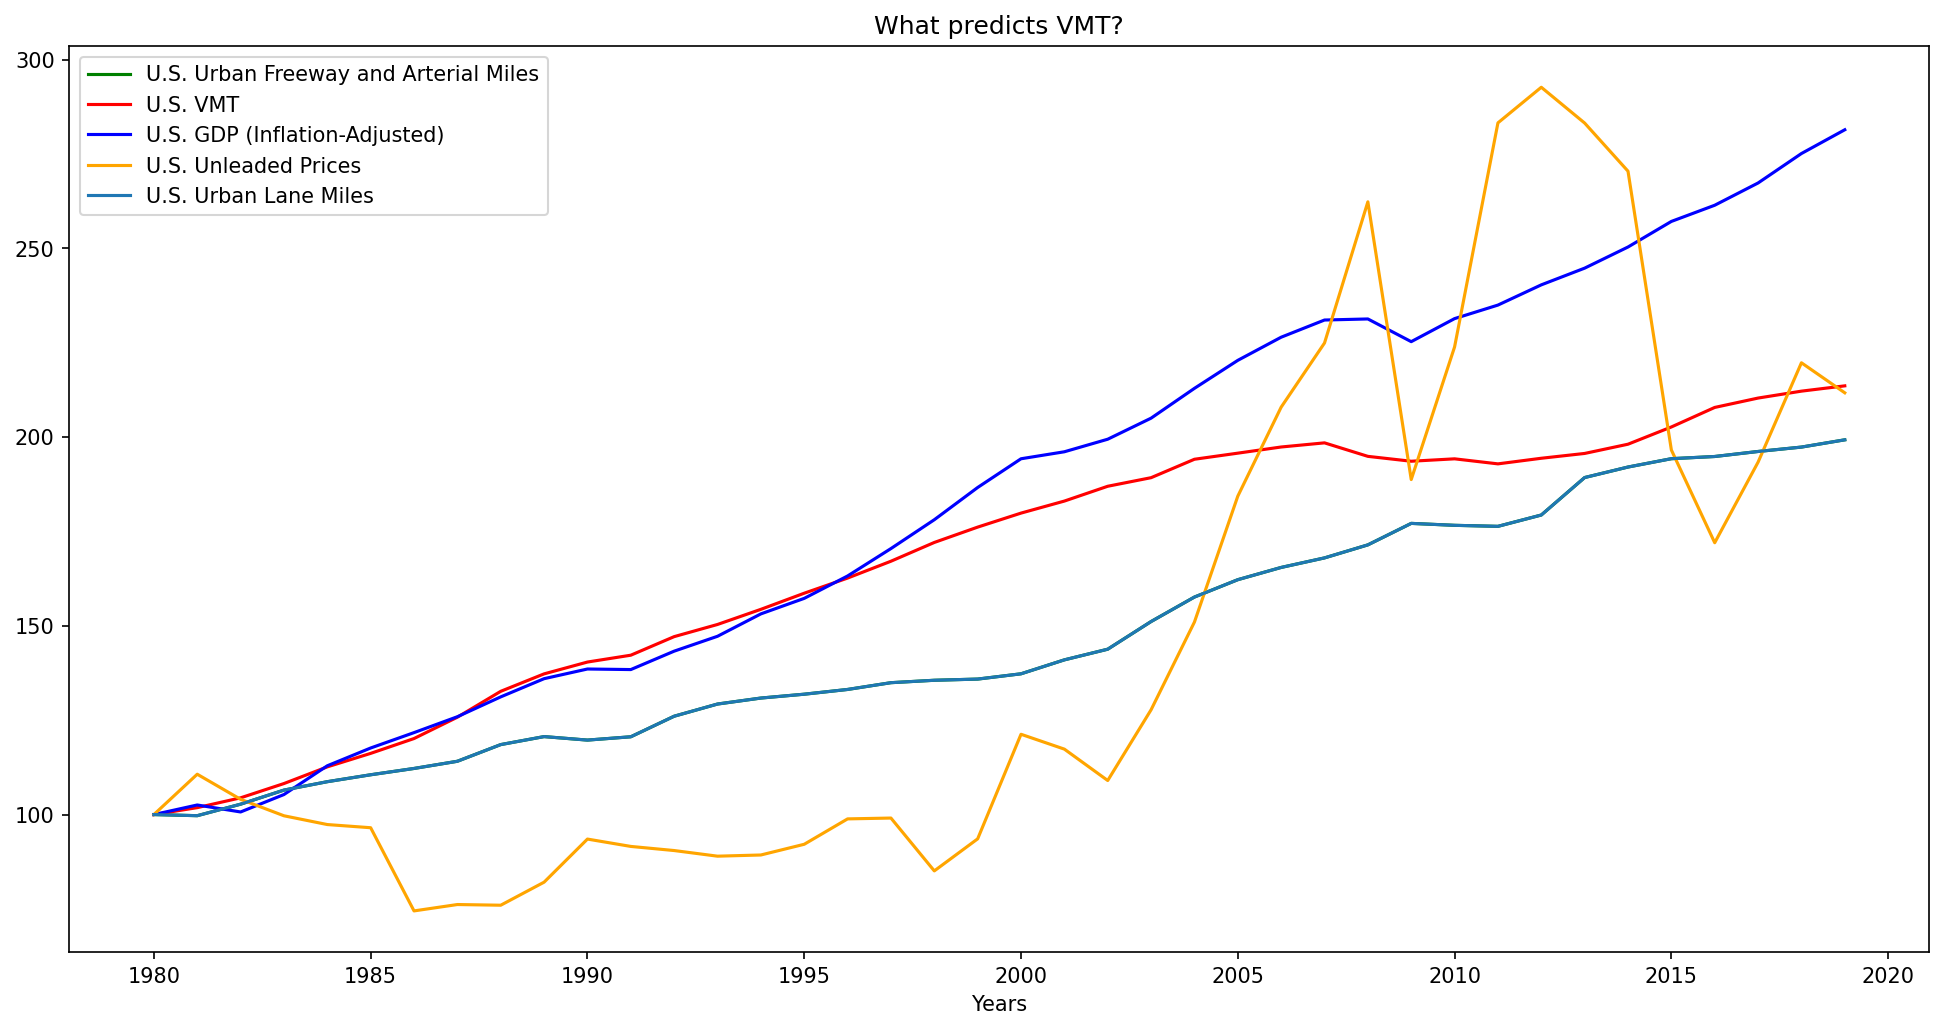

In [108]:
plt.figure(figsize=(16, 8), dpi=150)
  
df['ALL_URBAN_NORM'].plot(label='U.S. Urban Freeway and Arterial Miles', color='green')
df['VMT_NORM'].plot(label='U.S. VMT',color='red')
gdp['GDP'].plot(label='U.S. GDP (Inflation-Adjusted)',color='blue')
gas['GAS_NORM'].plot(label='U.S. Unleaded Prices',color='orange')
df['ALL_URBAN_NORM'].plot(label='U.S. Urban Lane Miles')
  
# adding title to the plot
plt.title('What predicts VMT?')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [109]:
lanemiles_CA=pd.read_excel('/Users/michaelrosen/Desktop/AMB/CA_lanemiles_pop.xlsx')

In [135]:
lanemiles_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1980 to 2019
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Interstate (rural)                  40 non-null     float64
 1   Other freeways (rural)              10 non-null     float64
 2   Other principal arterial (rural)    40 non-null     float64
 3   Minor arterial (rural)              40 non-null     float64
 4   Major collector (rural)             40 non-null     float64
 5   Minor collector (rural)             40 non-null     float64
 6   Local (rural)                       40 non-null     float64
 7   Total (rural)                       40 non-null     float64
 8   Interstate (urban)                  40 non-null     float64
 9   Other freeways (urban)              40 non-null     float64
 10  Other principal arterial (urban)    40 non-null     float64
 11  Minor arterial (urban)              40 non

In [112]:
lanemiles_CA['ALL_URBAN_NORM']=(lanemiles_CA['Total (urban)']/lanemiles_CA.iat[0,16])*100

In [113]:
lanemiles_CA.set_index('Year',inplace=True)

In [114]:
lanemiles_CA['ULM_per_capita']=(lanemiles_CA['Total (urban)']*1000000)/(lanemiles_CA['POP'])

In [115]:
lanemiles_CA['FREEWAYS']=lanemiles_CA['Interstate (urban)']+lanemiles_CA['Other freeways (urban)']

In [116]:
lanemiles_CA['FREEWAYS+ARTERIALS']=lanemiles_CA['Interstate (urban)']+lanemiles_CA['Other freeways (urban)']+lanemiles_CA['Other principal arterial (urban)']+lanemiles_CA['Minor arterial (urban)']

In [118]:
lanemiles_CA['FREEWAYS_NORM']=(lanemiles_CA['FREEWAYS']/lanemiles_CA.iat[0,20])*100
lanemiles_CA['FREEWAYS+ARTERIALS_NORM']=(lanemiles_CA['FREEWAYS+ARTERIALS']/lanemiles_CA.iat[0,21])*100

In [119]:
lanemiles_CA['FREEWAYS+ARTERIALS_per_capita']=(lanemiles_CA['FREEWAYS+ARTERIALS']*1000000)/(lanemiles_CA['POP'])
lanemiles_CA['FREEWAYS_per_capita']=(lanemiles_CA['FREEWAYS']*1000000)/(lanemiles_CA['POP'])

In [136]:
lanemiles_CA['ULM_per_capita_NORM']=(lanemiles_CA['ULM_per_capita']/lanemiles_CA.iat[0,19])*100
lanemiles_CA['FREEWAYS+ARTERIALS_per_capita_NORM']=(lanemiles_CA['FREEWAYS+ARTERIALS_per_capita']/lanemiles_CA.iat[0,24])*100
lanemiles_CA['FREEWAYS_per_capita_NORM']=(lanemiles_CA['FREEWAYS_per_capita']/lanemiles_CA.iat[0,25])*100

In [34]:
lanemiles_CA.head()

,Interstate (rural),Other freeways (rural),Other principal arterial (rural),Minor arterial (rural),Major collector (rural),Minor collector (rural),Local (rural),Total (rural),Interstate (urban),Other freeways (urban),...,ULM_per_capita,FREEWAYS,FREEWAYS+ARTERIALS,FREEWAYS_NORM,FREEWAYS+ARTERIALS_NORM,FREEWAYS+ARTERIALS_per_capita,FREEWAYS_per_capita,ULM_per_capita_NORM,FREEWAYS+ARTERIALS_per_capita_NORM,FREEWAYS_per_capita_NORM
Year,,,,,,,,,,,,,,,,,,,,,
1980,6741.0,NaN,9155.0,14767.0,26159.0,21468.0,162922.0,241212.0,5770.0,6413.0,...,6166.515411,12183.0,53470.0,100.000000,100.000000,2246.563141,511.873550,100.000000,438.890257,511.873550
1981,6741.0,NaN,9155.0,14767.0,26159.0,21792.0,156082.0,234696.0,5770.0,6413.0,...,6095.133343,12183.0,53470.0,100.000000,100.000000,2201.686054,501.648423,98.842425,430.123036,501.648423
1982,6741.0,NaN,9155.0,14767.0,26159.0,20480.0,153700.0,231002.0,5770.0,6413.0,...,6038.434555,12183.0,53470.0,100.000000,100.000000,2154.310258,490.853972,97.922962,420.867665,490.853972
1983,6710.0,NaN,9008.0,14174.0,26100.0,20486.0,151856.0,228334.0,6847.0,5889.0,...,6010.955982,12736.0,53956.0,104.539112,100.908921,2127.600342,502.207687,97.477353,415.649596,502.207687
1984,6610.0,NaN,8790.0,13900.0,25914.0,20288.0,148094.0,223596.0,6964.0,6251.0,...,5981.413454,13215.0,54614.0,108.470820,102.139517,2113.185634,511.329479,96.998273,412.833527,511.329479


In [121]:
msa=pd.read_excel('/Users/michaelrosen/Desktop/AMB/MSA_clean.xlsx')

In [122]:
msa['VMT_per_capita']=(msa['TOTAL (VMT)']*1000*365)/msa['CENSUS POPULATION']

In [123]:
msa['LM_per_capita']=msa['TOTAL (LM)']/msa['CENSUS POPULATION']

In [124]:
msa['ALL FREEWAYS (LM)']=msa['INTERSTATE MILES (LM)']+msa['FREEWAYS (LM)']+msa['OTHER PRINCIPAL ARTERIAL (LM)']+msa['MINOR ARTERIAL (LM)']

In [125]:
msa['ALL_FREEWAYS_LM_per_capita']=msa['ALL FREEWAYS (LM)']/msa['CENSUS POPULATION']

In [126]:
lanemiles_CA.head()

,Interstate (rural),Other freeways (rural),Other principal arterial (rural),Minor arterial (rural),Major collector (rural),Minor collector (rural),Local (rural),Total (rural),Interstate (urban),Other freeways (urban),...,ULM_per_capita,FREEWAYS,FREEWAYS+ARTERIALS,FREEWAYS_NORM,FREEWAYS+ARTERIALS_NORM,FREEWAYS+ARTERIALS_per_capita,FREEWAYS_per_capita,ULM_per_capita_NORM,FREEWAYS+ARTERIALS_per_capita_NORM,FREEWAYS_per_capita_NORM
Year,,,,,,,,,,,,,,,,,,,,,
1980,6741.0,NaN,9155.0,14767.0,26159.0,21468.0,162922.0,241212.0,5770.0,6413.0,...,6166.515411,12183.0,53470.0,100.000000,100.000000,2246.563141,511.873550,100.000000,438.890257,511.873550
1981,6741.0,NaN,9155.0,14767.0,26159.0,21792.0,156082.0,234696.0,5770.0,6413.0,...,6095.133343,12183.0,53470.0,100.000000,100.000000,2201.686054,501.648423,98.842425,430.123036,501.648423
1982,6741.0,NaN,9155.0,14767.0,26159.0,20480.0,153700.0,231002.0,5770.0,6413.0,...,6038.434555,12183.0,53470.0,100.000000,100.000000,2154.310258,490.853972,97.922962,420.867665,490.853972
1983,6710.0,NaN,9008.0,14174.0,26100.0,20486.0,151856.0,228334.0,6847.0,5889.0,...,6010.955982,12736.0,53956.0,104.539112,100.908921,2127.600342,502.207687,97.477353,415.649596,502.207687
1984,6610.0,NaN,8790.0,13900.0,25914.0,20288.0,148094.0,223596.0,6964.0,6251.0,...,5981.413454,13215.0,54614.0,108.470820,102.139517,2113.185634,511.329479,96.998273,412.833527,511.329479


In [127]:
CAvmt=pd.read_excel('/Users/michaelrosen/Desktop/AMB/california_historical_VMT.xlsx')

In [167]:
CAvmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1980 to 2019
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   INTERSTATE (RURAL)                      40 non-null     float64
 1   OTHER FREEWAYS AND EXPRESSWAYS (RURAL)  11 non-null     float64
 2   OTHER PRINCIPAL ARTERIAL (RURAL)        40 non-null     float64
 3   MINOR ARTERIAL (RURAL)                  40 non-null     float64
 4   MAJOR COLLECTOR (RURAL)                 40 non-null     float64
 5   MINOR COLLECTOR (RURAL)                 40 non-null     float64
 6   LOCAL (RURAL)                           40 non-null     float64
 7   TOTAL (RURAL)                           40 non-null     float64
 8   INTERSTATE (URBAN)                      40 non-null     float64
 9   OTHER FREEWAYS AND EXPRESSWAYS (URBAN)  40 non-null     float64
 10  OTHER PRINCIPAL ARTERIAL (URBAN)        40 non-null     flo

In [129]:
CAvmt['VMT_NORM']=(CAvmt['VMT']/CAvmt.iat[0,17])*100

In [165]:
CAvmt['VMT_per_capita']=(CAvmt['VMT']*1000000)/lanemiles_CA['POP']

In [168]:
CAvmt['VMT_per_capita_NORM']=(CAvmt['VMT_per_capita']/CAvmt.iat[0,18])*100

In [133]:
CAvmt.set_index('YEAR',inplace=True)

In [166]:
CAvmt.head()

,INTERSTATE (RURAL),OTHER FREEWAYS AND EXPRESSWAYS (RURAL),OTHER PRINCIPAL ARTERIAL (RURAL),MINOR ARTERIAL (RURAL),MAJOR COLLECTOR (RURAL),MINOR COLLECTOR (RURAL),LOCAL (RURAL),TOTAL (RURAL),INTERSTATE (URBAN),OTHER FREEWAYS AND EXPRESSWAYS (URBAN),OTHER PRINCIPAL ARTERIAL (URBAN),MINOR ARTERIAL (URBAN),MAJOR COLLECTOR (URBAN),MINOR COLLECTOR (URBAN),LOCAL (URBAN),TOTAL (URBAN),VMT,VMT_NORM,VMT_per_capita,VMT_per_capita_NORM
YEAR,,,,,,,,,,,,,,,,,,,,
1980,8842.0,NaN,10191.0,6508.0,9542.0,3301.0,5236.0,43620.0,27176.0,25542.0,28433.0,17130.0,6995.0,NaN,6994.0,112270.0,155890.0,100.000000,6549.779839,NaN
1981,8636.0,NaN,10444.0,6841.0,9987.0,3455.0,5206.0,44569.0,27737.0,26029.0,30587.0,17694.0,6112.0,NaN,7172.0,115331.0,159900.0,102.572327,6584.058352,NaN
1982,9046.0,NaN,10502.0,7215.0,8295.0,2497.0,4234.0,41789.0,28650.0,28142.0,36245.0,22736.0,8137.0,NaN,4300.0,128210.0,169999.0,109.050613,6849.272295,NaN
1983,9458.0,NaN,10863.0,7519.0,7871.0,2486.0,4197.0,42394.0,34545.0,25023.0,36733.0,22941.0,8288.0,NaN,12728.0,140258.0,182652.0,117.167233,7202.358546,NaN
1984,9666.0,NaN,11188.0,7594.0,7681.0,2467.0,5965.0,44561.0,36699.0,27666.0,37590.0,23244.0,8664.0,NaN,18113.0,151976.0,196537.0,126.074155,7604.628207,NaN


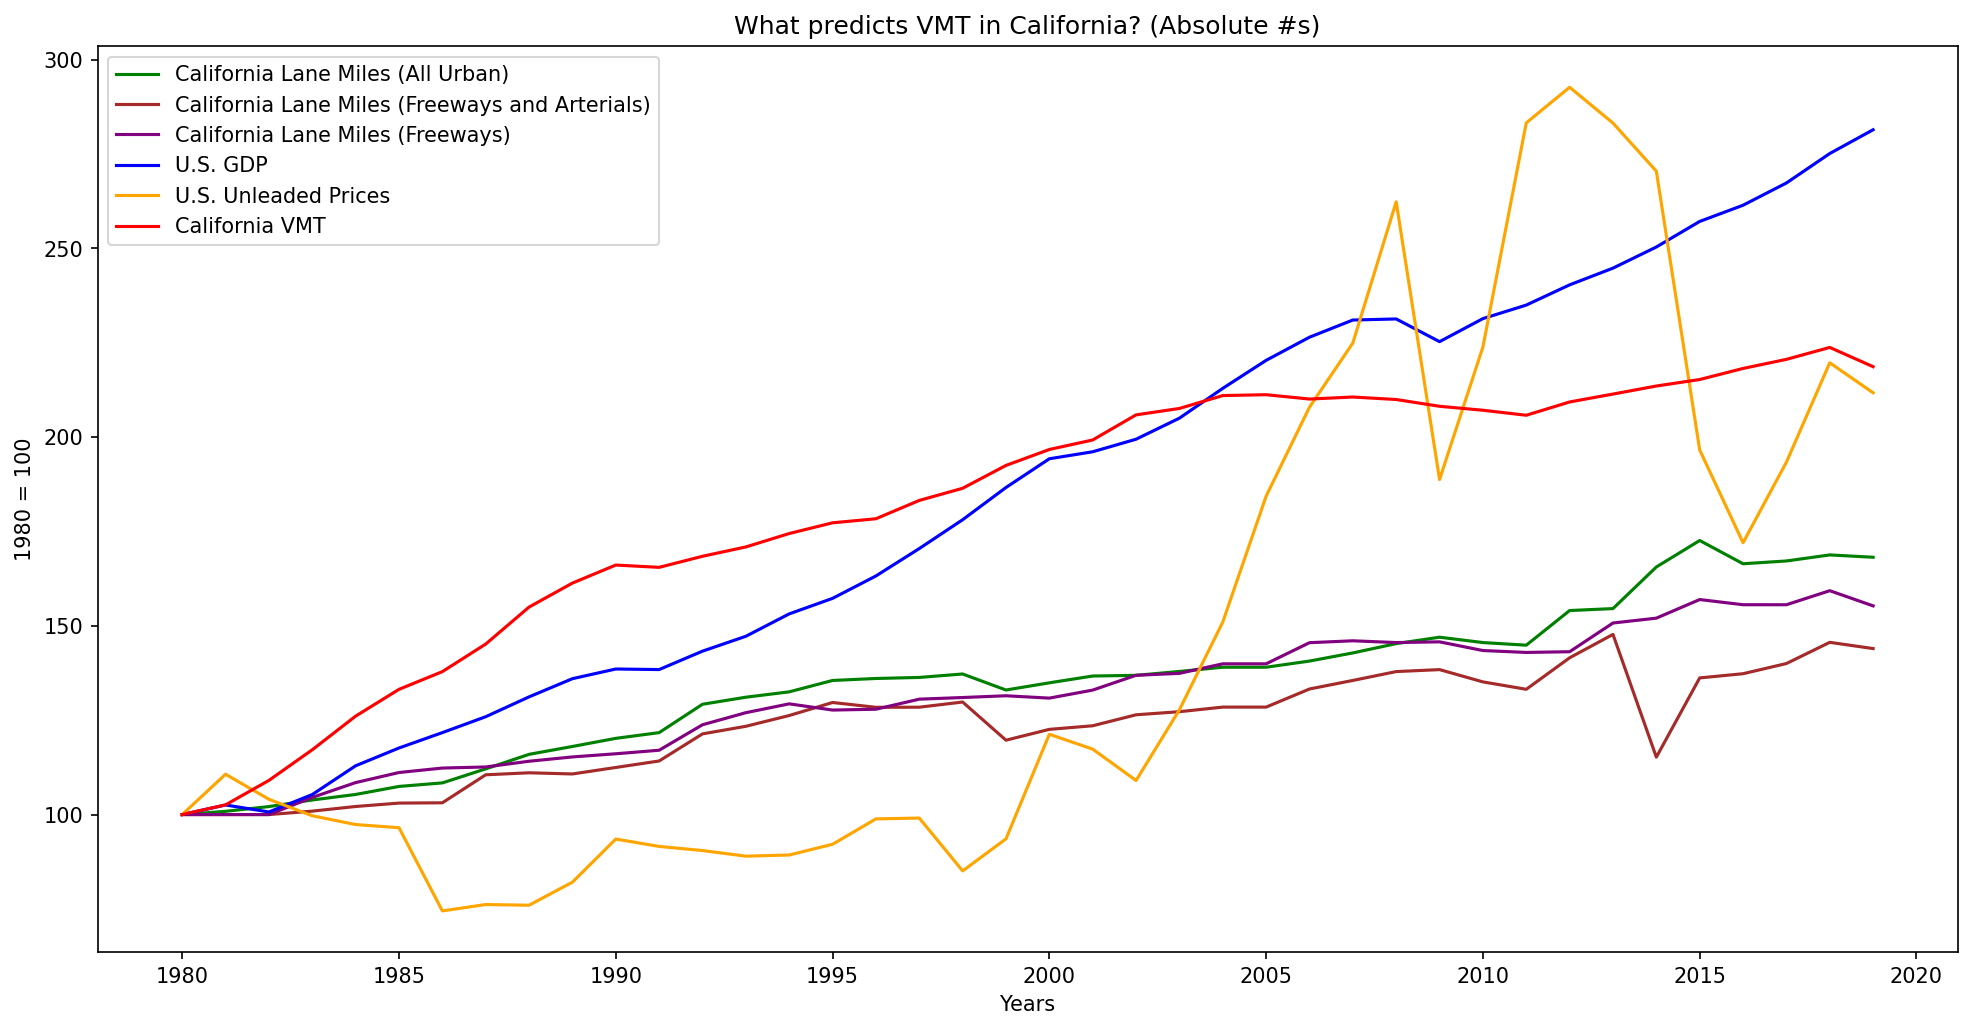

In [147]:
plt.figure(figsize=(16, 8), dpi=150)
  
lanemiles_CA['ALL_URBAN_NORM'].plot(label='California Lane Miles (All Urban)', color='green')
lanemiles_CA['FREEWAYS+ARTERIALS_NORM'].plot(label='California Lane Miles (Freeways and Arterials)', color='brown')
lanemiles_CA['FREEWAYS_NORM'].plot(label='California Lane Miles (Freeways)', color='purple')
gdp['GDP'].plot(label='U.S. GDP',color='blue')
gas['GAS_NORM'].plot(label='U.S. Unleaded Prices',color='orange')
CAvmt['VMT_NORM'].plot(label='California VMT',color='red')
  
# adding title to the plot
plt.title('What predicts VMT in California? (Absolute #s)')
  
# adding Label to the x-axis
plt.xlabel('Years')
plt.ylabel('1980 = 100')
  
# adding legend to the curve
plt.legend()

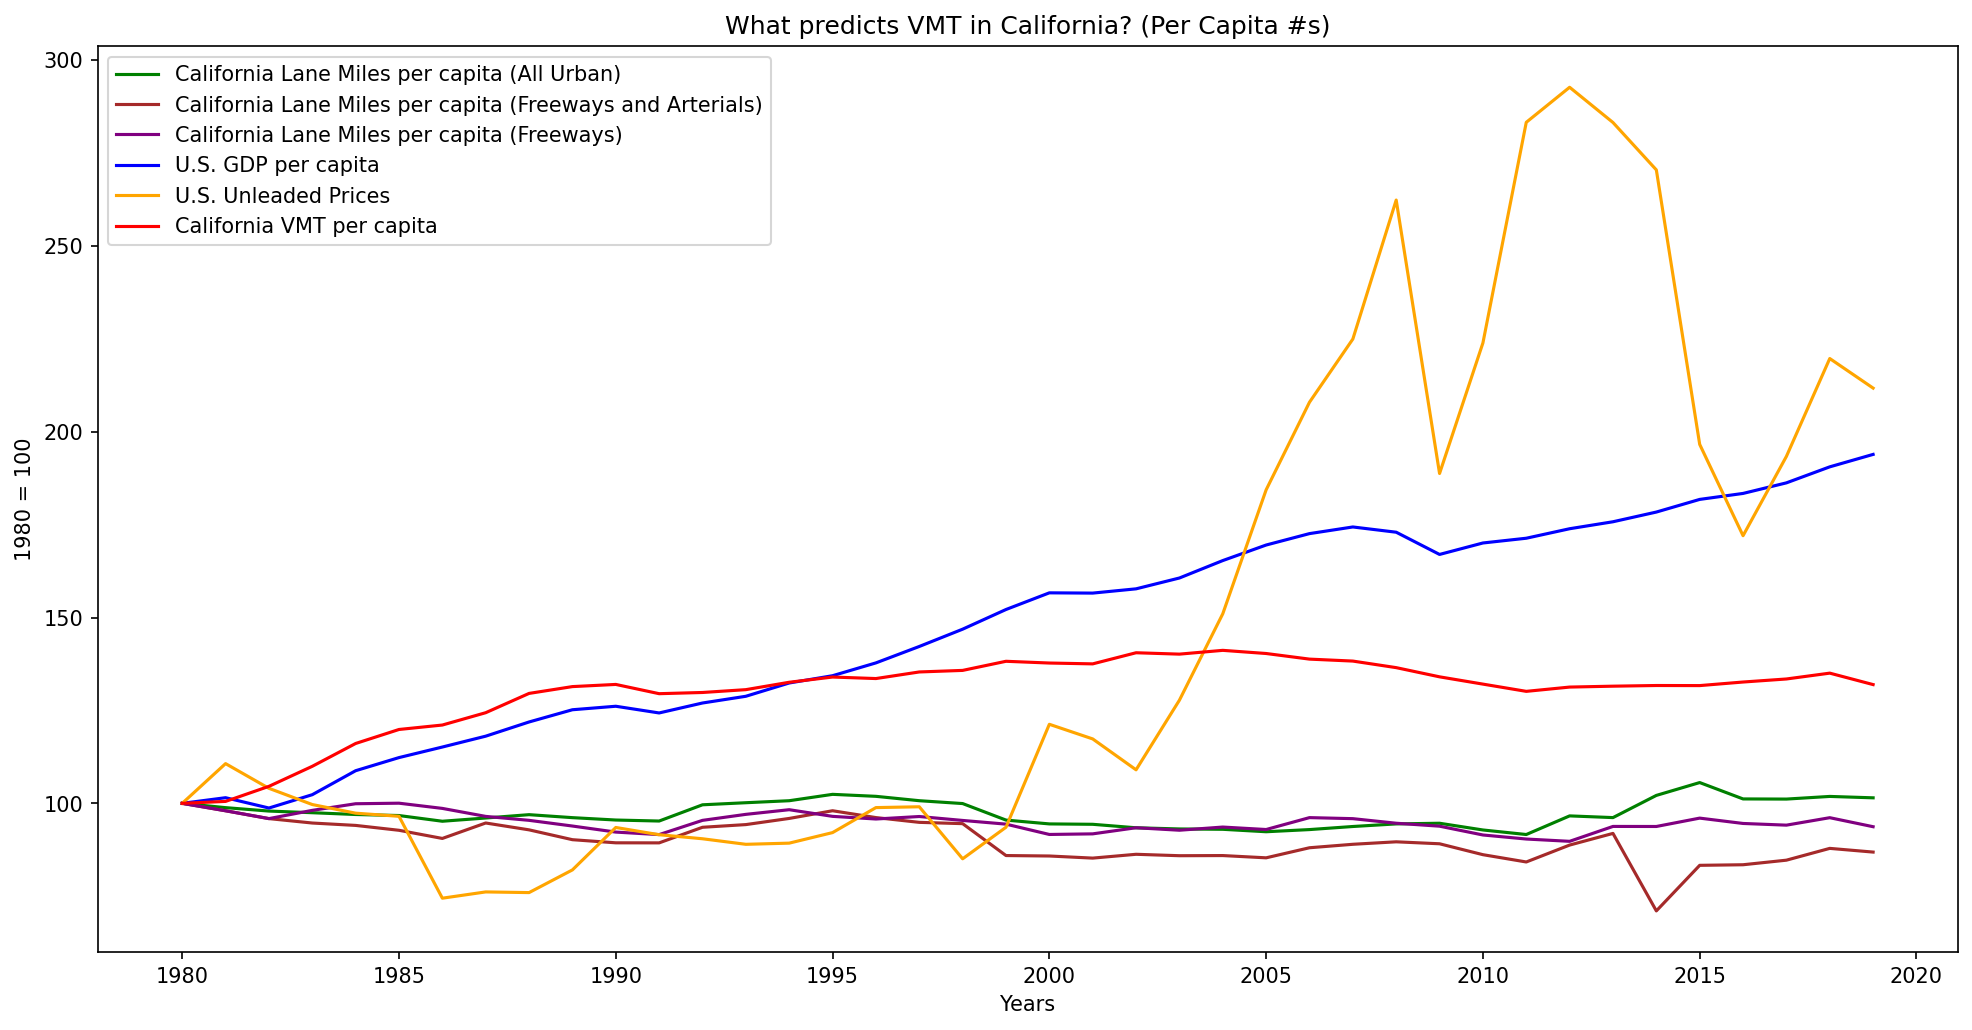

In [169]:
plt.figure(figsize=(16, 8), dpi=150)
  
lanemiles_CA['ULM_per_capita_NORM'].plot(label='California Lane Miles per capita (All Urban)', color='green')
lanemiles_CA['FREEWAYS+ARTERIALS_per_capita_NORM'].plot(label='California Lane Miles per capita (Freeways and Arterials)', color='brown')
lanemiles_CA['FREEWAYS_per_capita_NORM'].plot(label='California Lane Miles per capita (Freeways)', color='purple')
gdp_per_capita['GDP_NORM'].plot(label='U.S. GDP per capita',color='blue')
gas['GAS_NORM'].plot(label='U.S. Unleaded Prices',color='orange')
CAvmt['VMT_per_capita_NORM'].plot(label='California VMT per capita',color='red')
  
# adding title to the plot
plt.title('What predicts VMT in California? (Per Capita #s)')
  
# adding Label to the x-axis
plt.xlabel('Years')
plt.ylabel('1980 = 100')
  
# adding legend to the curve
plt.legend()

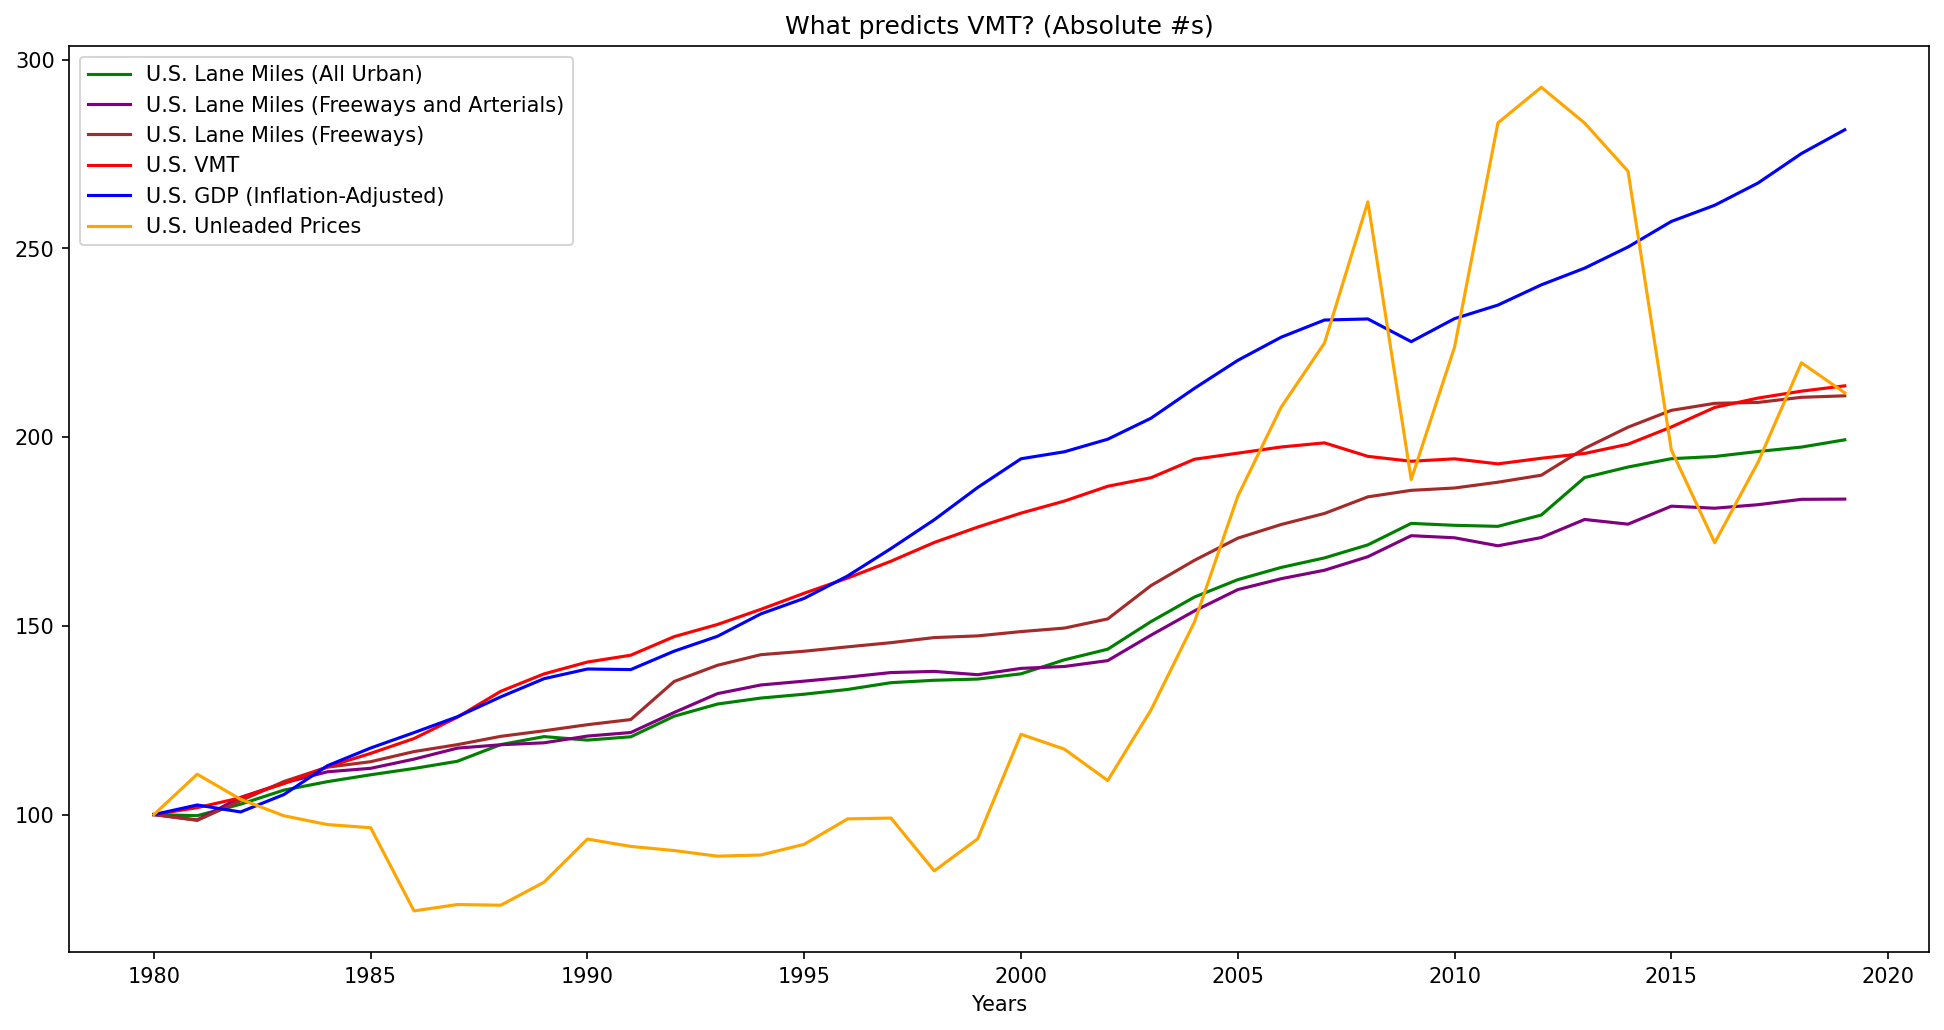

In [144]:
plt.figure(figsize=(16, 8), dpi=150)
  
df['ALL_URBAN_NORM'].plot(label='U.S. Lane Miles (All Urban)', color='green')
df['FREEWAYS+ARTERIALS_NORM'].plot(label='U.S. Lane Miles (Freeways and Arterials)',color='purple')
df['FREEWAYS_NORM'].plot(label='U.S. Lane Miles (Freeways)', color='brown')
df['VMT_NORM'].plot(label='U.S. VMT',color='red')
gdp['GDP'].plot(label='U.S. GDP (Inflation-Adjusted)',color='blue')
gas['GAS_NORM'].plot(label='U.S. Unleaded Prices',color='orange')

# adding title to the plot
plt.title('What predicts VMT? (Absolute #s)')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

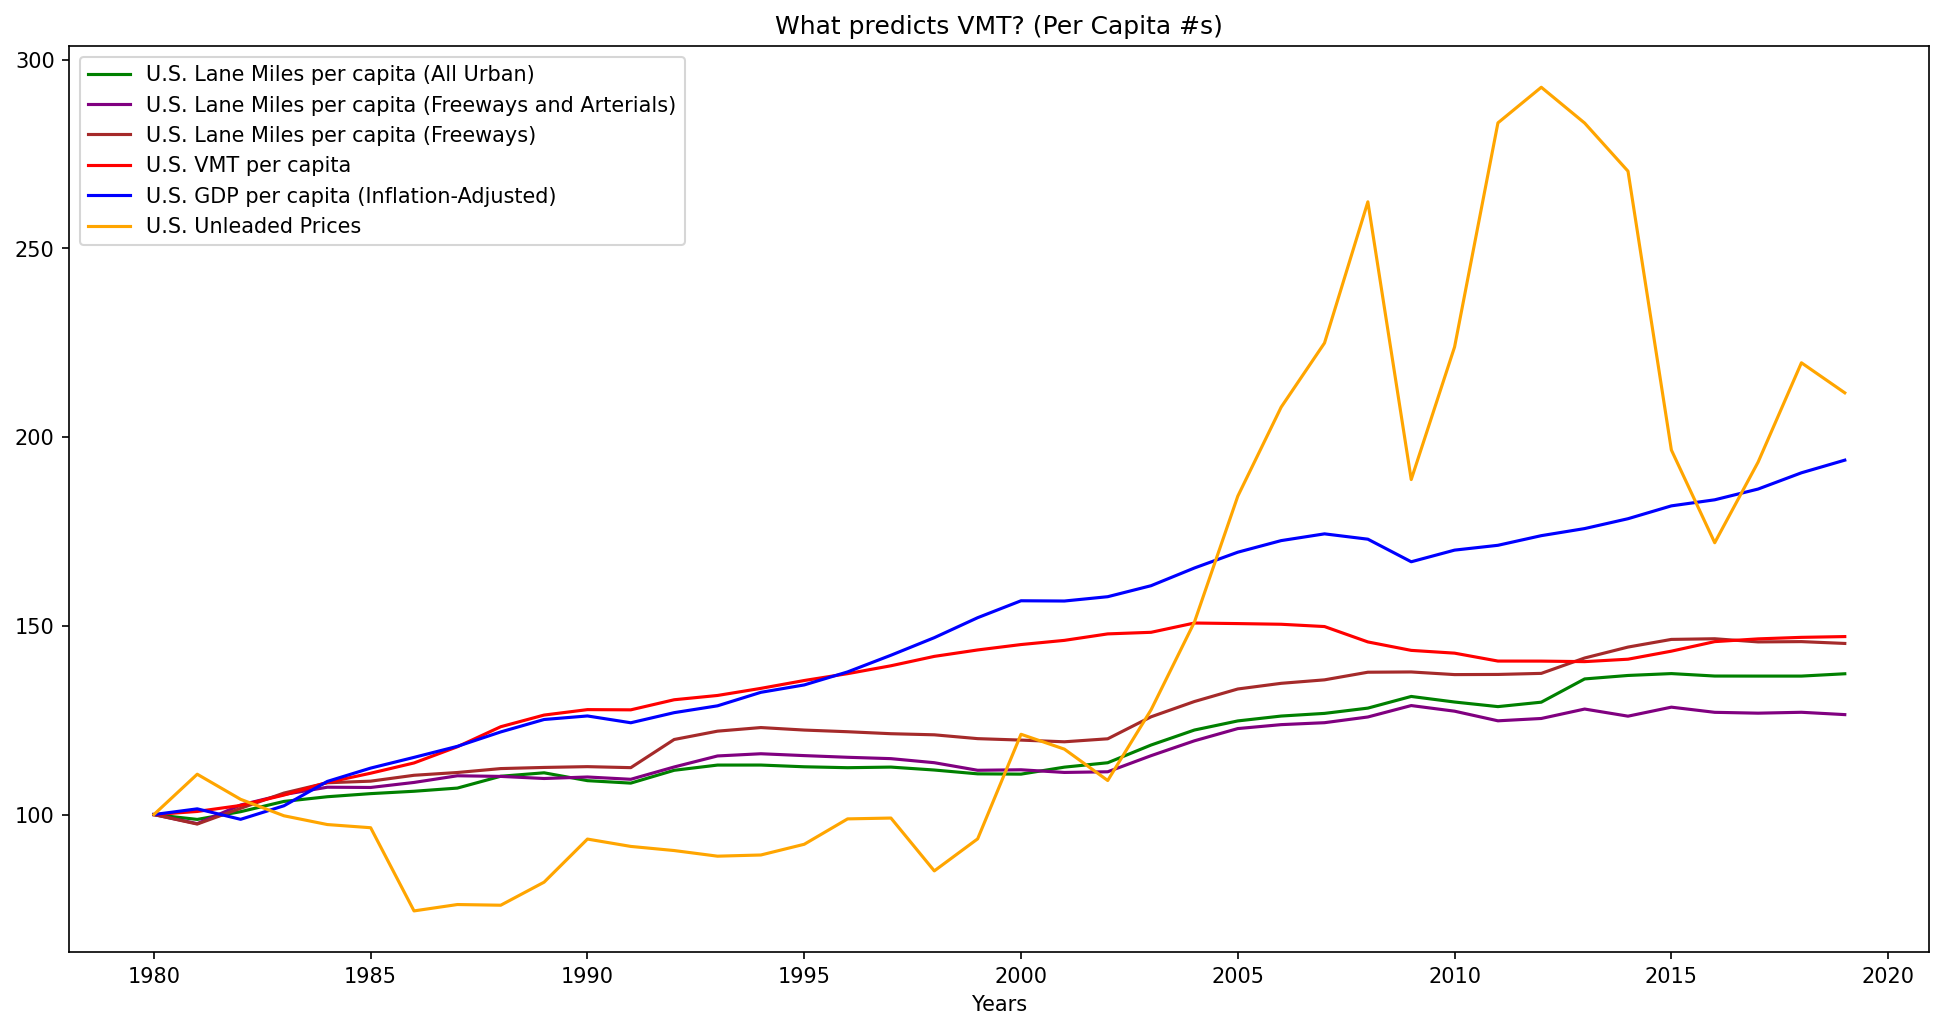

In [163]:
plt.figure(figsize=(16, 8), dpi=150)
  
df['ALL_URBAN_per_capita_NORM'].plot(label='U.S. Lane Miles per capita (All Urban)', color='green')
df['FREEWAYS+ARTERIALS_per_capita_NORM'].plot(label='U.S. Lane Miles per capita (Freeways and Arterials)',color='purple')
df['FREEWAYS_per_capita_NORM'].plot(label='U.S. Lane Miles per capita (Freeways)', color='brown')
df['VMT_per_capita_NORM'].plot(label='U.S. VMT per capita',color='red')
gdp_per_capita['GDP_NORM'].plot(label='U.S. GDP per capita (Inflation-Adjusted)',color='blue')
gas['GAS_NORM'].plot(label='U.S. Unleaded Prices',color='orange')

# adding title to the plot
plt.title('What predicts VMT? (Per Capita #s)')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [57]:
gdp_per_capita=pd.read_excel('/Users/michaelrosen/Desktop/AMB/GDP_per_capita_inflation_adjust.xls')

In [58]:
gdp_per_capita.head()

,Year,GDP
0,1980,29701.00
1,1981,30151.75
2,1982,29326.75
3,1983,30392.50
4,1984,32308.50


In [59]:
gdp_per_capita['GDP_NORM']=(gdp_per_capita['GDP']/gdp_per_capita.iat[0,1])*100

In [62]:
gdp_per_capita.set_index('Year',inplace=True)

In [151]:
df.head()

,INTERSTATE (RURAL),OTHER FREEWAYS AND EXPRESSWAYS (RURAL),OTHER PRINCIPAL ARTERIAL (RURAL),MINOR ARTERIAL (RURAL),MAJOR COLLECTOR (RURAL),MINOR COLLECTOR (RURAL),LOCAL (RURAL),TOTAL (RURAL),INTERSTATE (URBAN),OTHER FREEWAYS AND EXPRESSWAYS (URBAN),...,VMT_NORM,FREEWAYS_NORM,FREEWAYS+ARTERIALS_per_capita,FREEWAYS_per_capita,ALL_URBAN_per_capita,VMT_per_capita,FREEWAYS+ARTERIALS_per_capita_NORM,FREEWAYS_per_capita_NORM,ALL_URBAN_per_capita_NORM,VMT_per_capita_NORM
YEAR,,,,,,,,,,,,,,,,,,,,,
1980,130980.0,NaN,201334.0,305764.0,832041.0,599226.0,4457584.0,6526929.0,48458.0,29487.0,...,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,128301.0,NaN,193624.0,293235.0,816564.0,599048.0,4434670.0,6465442.0,47712.0,29033.0,...,101.834158,98.460453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,132011.0,NaN,203147.0,312129.0,885115.0,597920.0,4448994.0,6579316.0,50187.0,30609.0,...,104.433656,103.657707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,131825.0,NaN,202488.0,309549.0,884357.0,600138.0,4441024.0,6569381.0,54217.0,30558.0,...,108.216684,108.762589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,131245.0,NaN,201918.0,308416.0,872089.0,596504.0,4449220.0,6559392.0,56616.0,31111.0,...,112.635018,112.549875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
